### Importing required libraries

In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import stats for performing statistical tests
import scipy.stats as stats

# import OrdinalEmcoder
from sklearn.preprocessing import OrdinalEncoder

# import train-test split
from sklearn.model_selection import train_test_split

# import Standardscaler
from sklearn.preprocessing import StandardScaler

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import KFold,GridSearchCV

# import KNearestNeighbor
from sklearn.neighbors import KNeighborsClassifier

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import StackingClassifier
from sklearn.ensemble import StackingClassifier

# import NaiveBayes
from sklearn.naive_bayes import GaussianNB

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

### Read the dataset and view the first 10 rows of it.

In [3]:
df = pd.read_excel('Data-1.xlsx')
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Check the shape/dimension of the dataset

In [4]:
df.shape

(5000, 14)

In [5]:
df.ndim

2

### Check for the missing values.Display number of missing values per column

In [6]:
missing_values = pd.DataFrame(columns = ['Name','No of missing values','% of missing values'])

missing_values['Name'] = df.columns
missing_values['No of missing values'] = df.isnull().sum().values
missing_values['% of missing values'] = (df.isnull().sum() / len(df)).values * 100

missing_values

Name  No of missing values  % of missing values
0                   ID                     0                  0.0
1                  Age                     0                  0.0
2           Experience                     0                  0.0
3               Income                     0                  0.0
4             ZIP Code                     0                  0.0
5               Family                     0                  0.0
6                CCAvg                     0                  0.0
7            Education                     0                  0.0
8             Mortgage                     0                  0.0
9        Personal Loan                     0                  0.0
10  Securities Account                     0                  0.0
11          CD Account                     0                  0.0
12              Online                     0                  0.0
13          CreditCard                     0                  0.0

### Check the datatype, number of non null values and name of each variable in the dataset.¶

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Dropping of irrelevant columns

In [8]:
df.drop(columns = ['ID','ZIP Code'],inplace = True)

### Check the summary statistics of the dataset.

In [9]:
df.describe(include = np.number).T

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937913    1.747666   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Personal Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   
Securities Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Personal Loan         1.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

### Univariate Analysis

#### Personal Loan

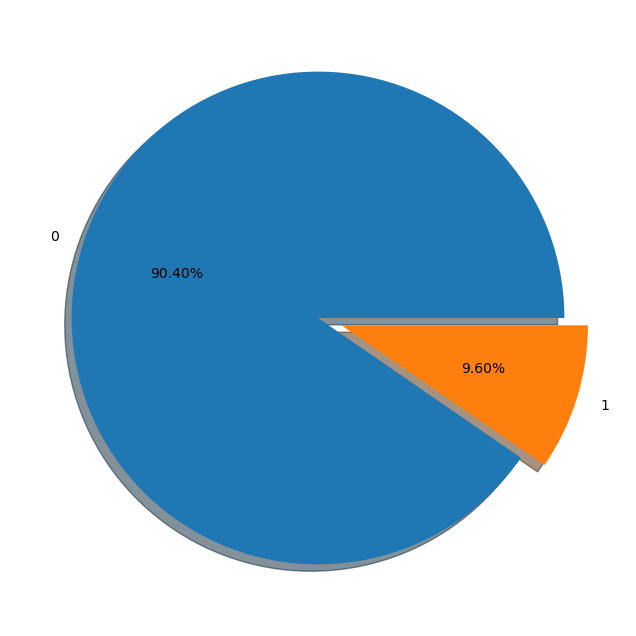

In [10]:
plt.pie(df['Personal Loan'].value_counts(), autopct = '%.2f%%',labels = df['Personal Loan'].unique(),
        shadow = True, explode = [0,0.1])
plt.show()

#### Age

In [43]:
sns.distplot(df['Age'])
plt.show()

#### Experience

In [44]:
df['Experience'].unique()

array([-1.82694474, -0.02503997, -0.37179333, -0.93033695, -1.0296513 ,
       -0.55198713,  0.62761053,  0.38824452, -0.83312344,  1.53659029,
       -1.34352179,  0.30711818,  1.01482163,  1.68195967,  0.86155407,
       -0.46124879, -0.11021692,  0.14265256,  0.70616002,  0.93844343,
       -0.73778063, -0.28352397,  0.05923251,  1.24107066, -1.23581493,
        0.46868108, -1.13135429, -0.64412056,  0.54845993,  1.38966072,
       -0.19635647, -1.69467767,  1.31557998,  0.78413345, -1.57168146,
        0.22526701, -2.14942768,  1.16611827, -1.97492411,  1.46332653,
        1.60946416,  1.0907074 , -1.45514914, -2.34443431,  1.7540877 ,
       -2.55407545,  1.82585861])

<AxesSubplot:xlabel='Experience', ylabel='Density'>

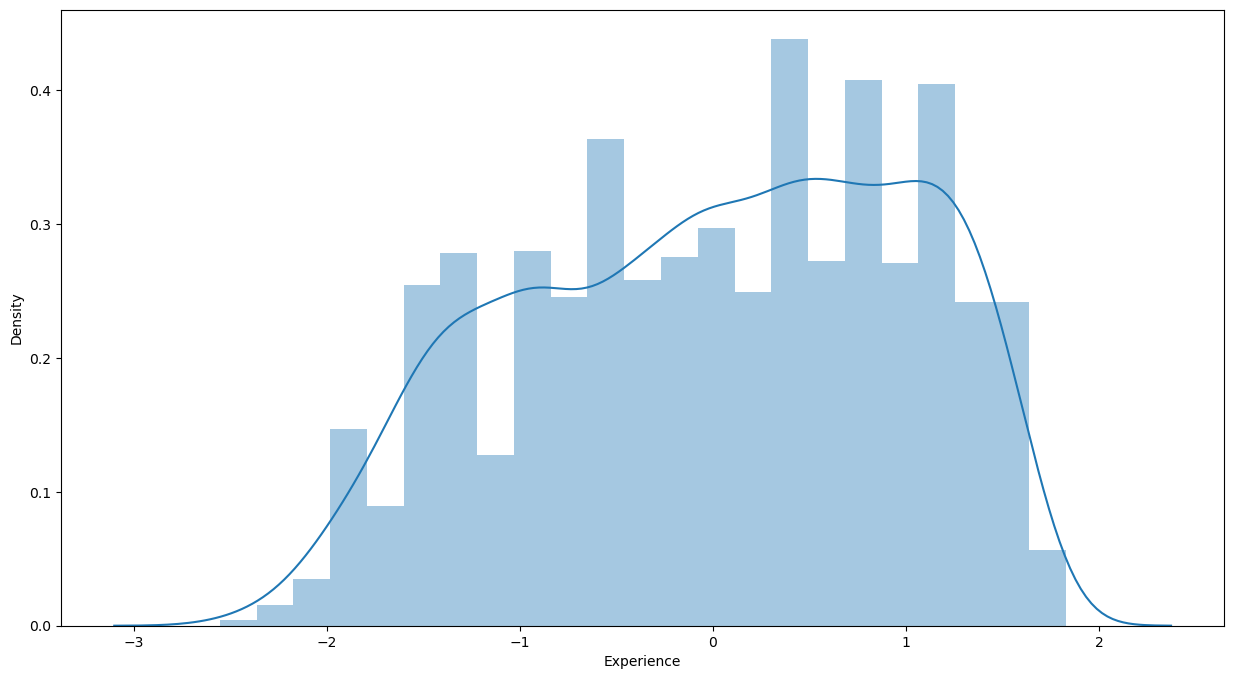

In [45]:
sns.distplot(df['Experience'])

#### Income

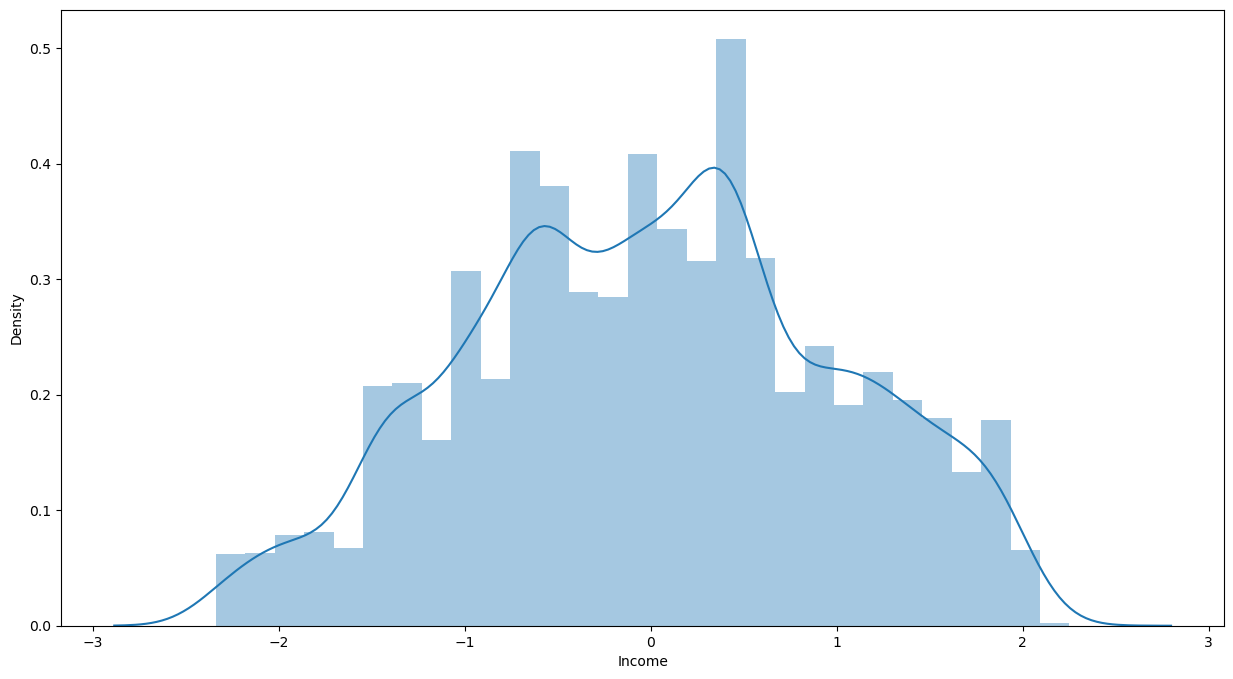

In [46]:
sns.distplot(df['Income'])
plt.show()

#### Family

In [47]:
df['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

In [48]:
sns.countplot(df['Family'])

for i,v in enumerate(df['Family'].value_counts().sort_index()):
    plt.text(x = i , y = v + 20 , s = v)

#### Education

In [49]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

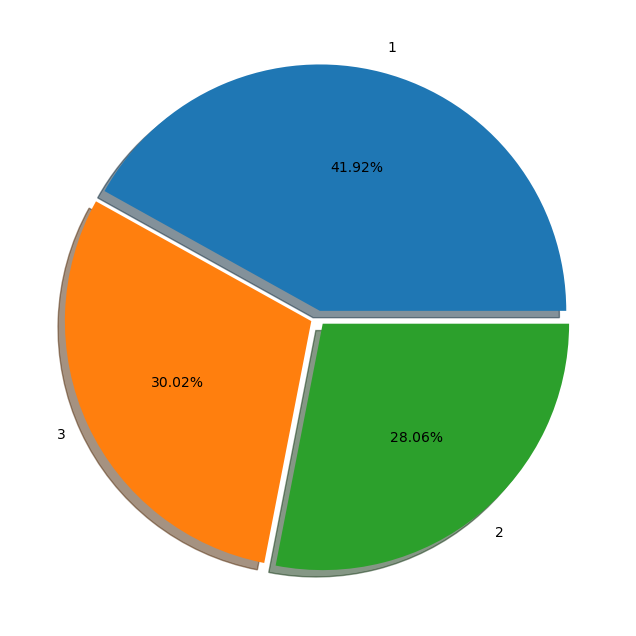

In [50]:
plt.pie(df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct = '%.2f%%',
       shadow = True, explode = [0.03,0.03,0.03])
plt.show()

#### Mortgage

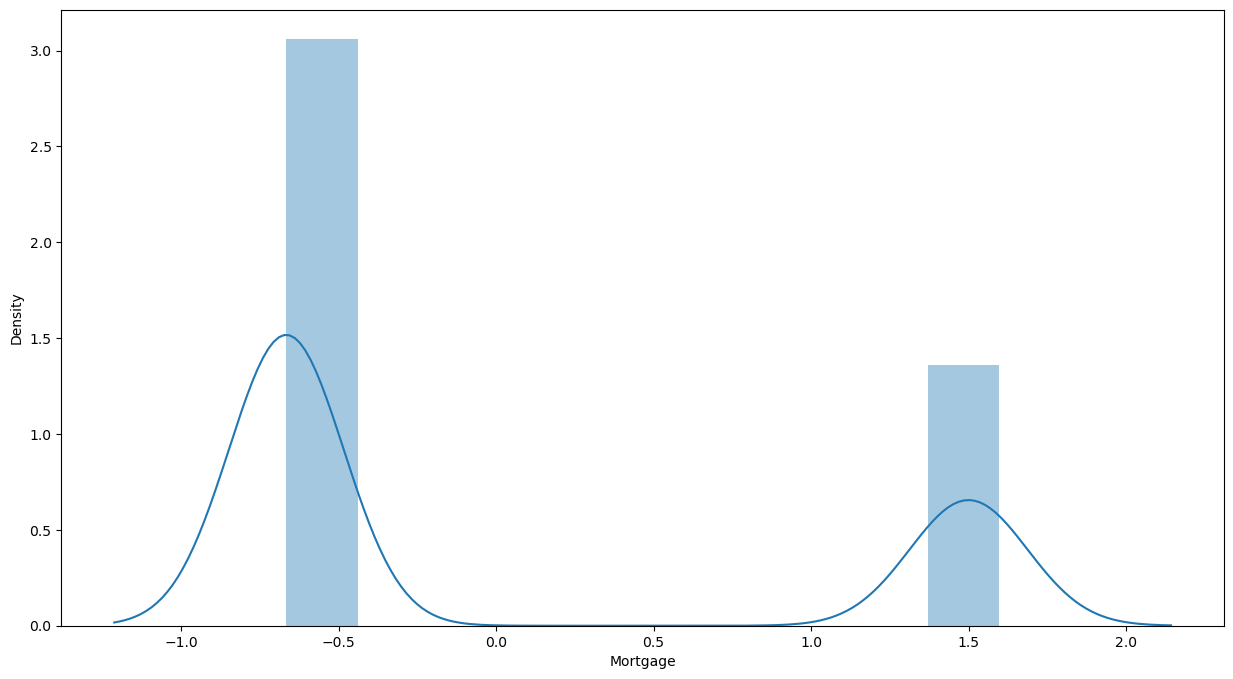

In [51]:
sns.distplot(df['Mortgage'])
plt.show()

#### Online

In [52]:
df['Online'].unique()

array([0, 1], dtype=int64)

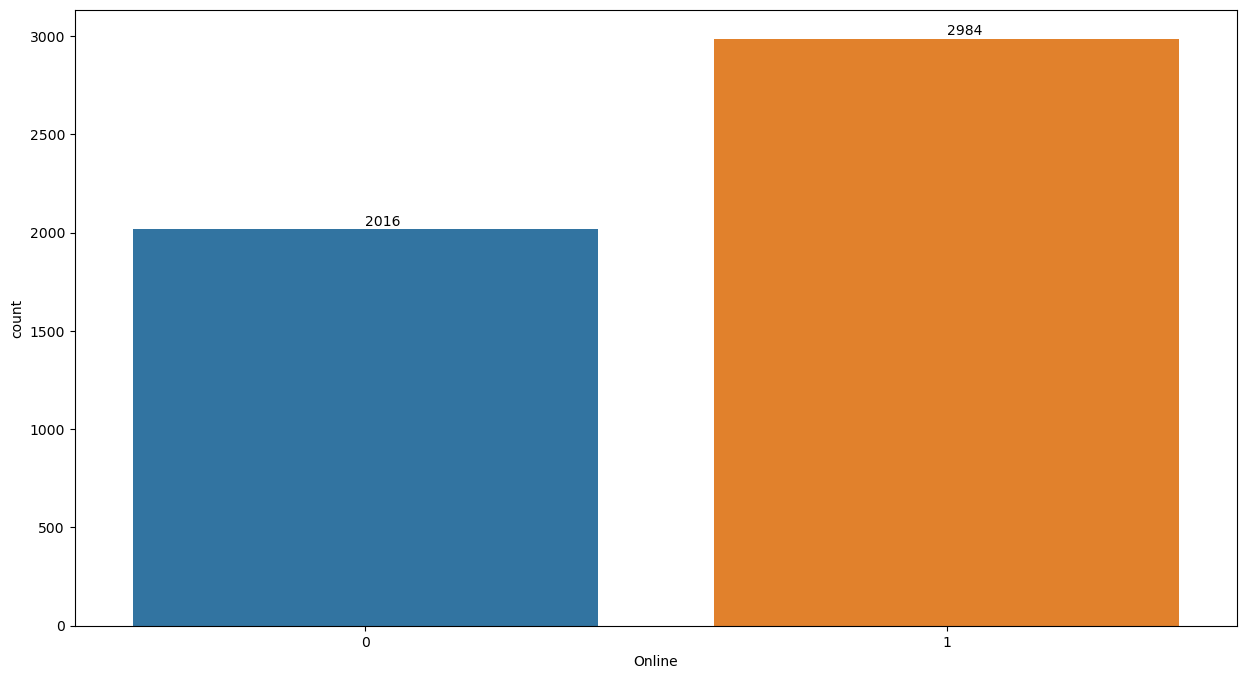

In [53]:
sns.countplot(df['Online'])

for i,v in enumerate(df['Online'].value_counts().sort_index()):
    plt.text(x = i , y = v +20, s = v)

#### CreditCard

In [54]:
df['CreditCard'].unique()

array([0, 1], dtype=int64)

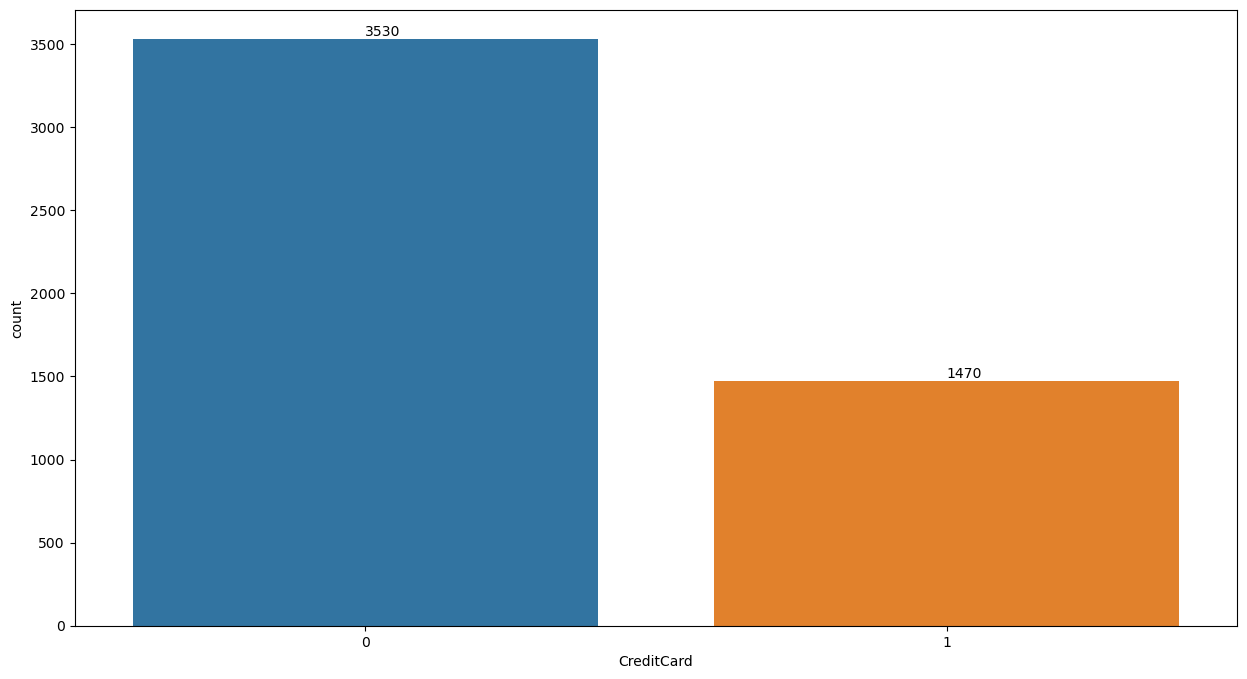

In [55]:
sns.countplot(df['CreditCard'])

for i,v in enumerate(df['CreditCard'].value_counts().sort_index()):
    plt.text(x = i , y = v +20, s = v)

#### CD Account

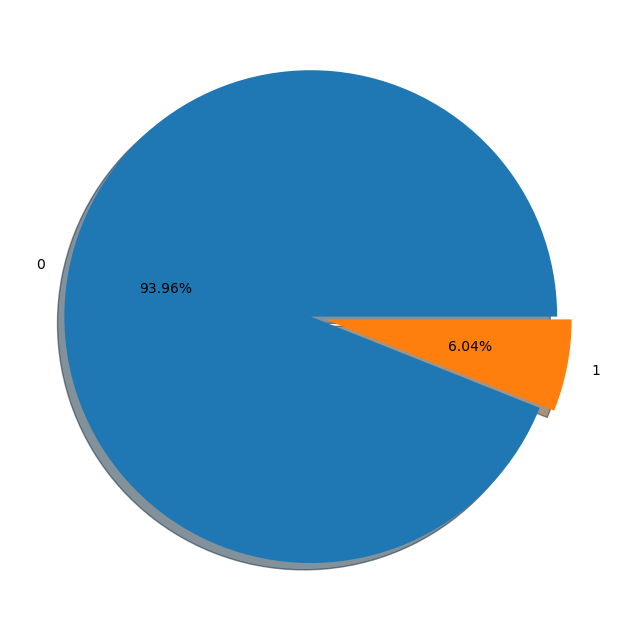

In [56]:
plt.pie(df['CD Account'].value_counts(), labels = df['CD Account'].value_counts().index, autopct = '%.2f%%',
       shadow = True, explode = [0.03,0.03])
plt.show()

### Bivariate Analysis

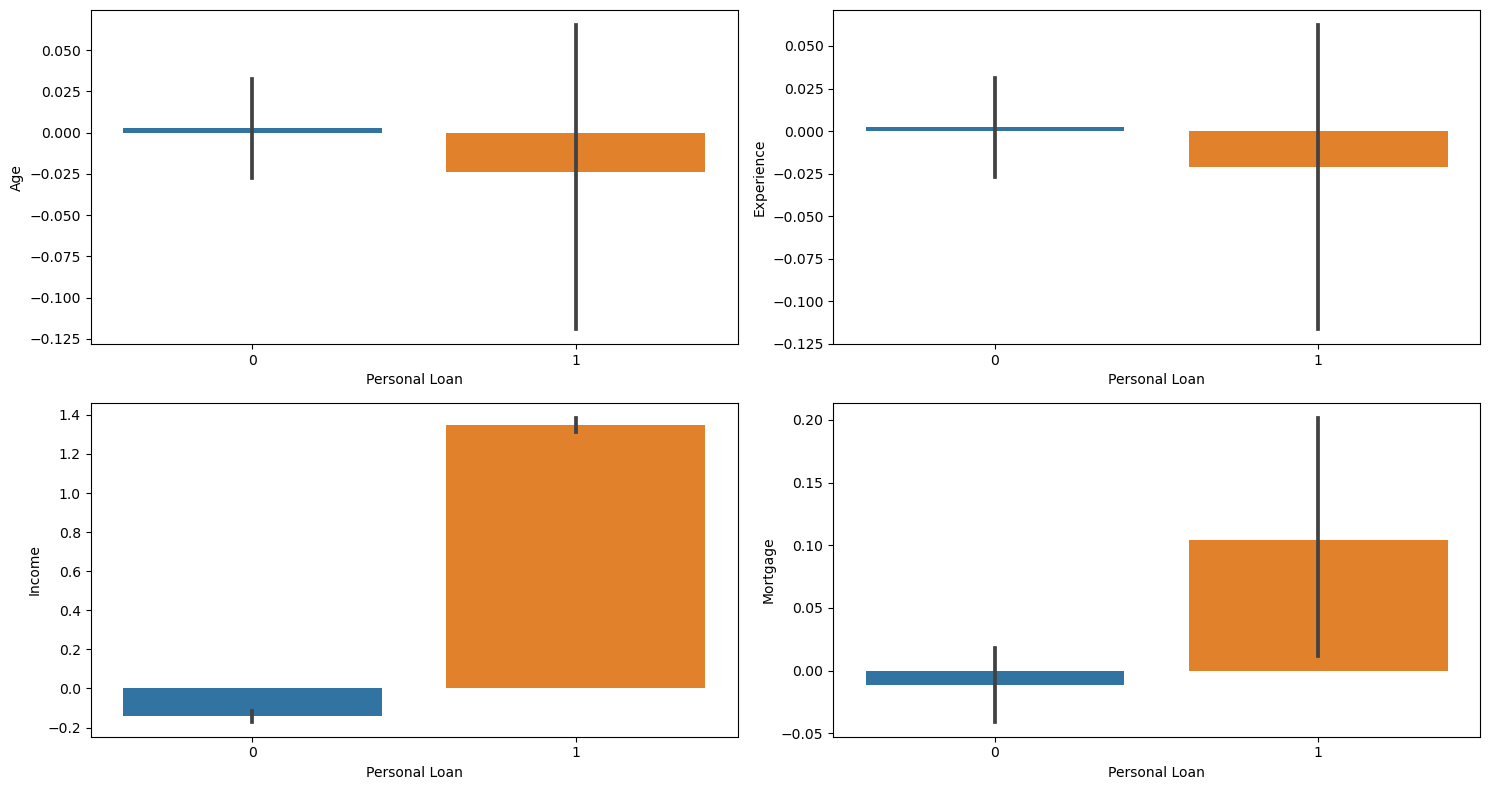

In [57]:
num_cols = ['Age','Experience','Income','Mortgage']

f,ax = plt.subplots(2,2)

for i,v in zip(num_cols,ax.flatten()):
    sns.barplot(x = df['Personal Loan'], y = df[i],ax = v)
plt.tight_layout()
plt.show()

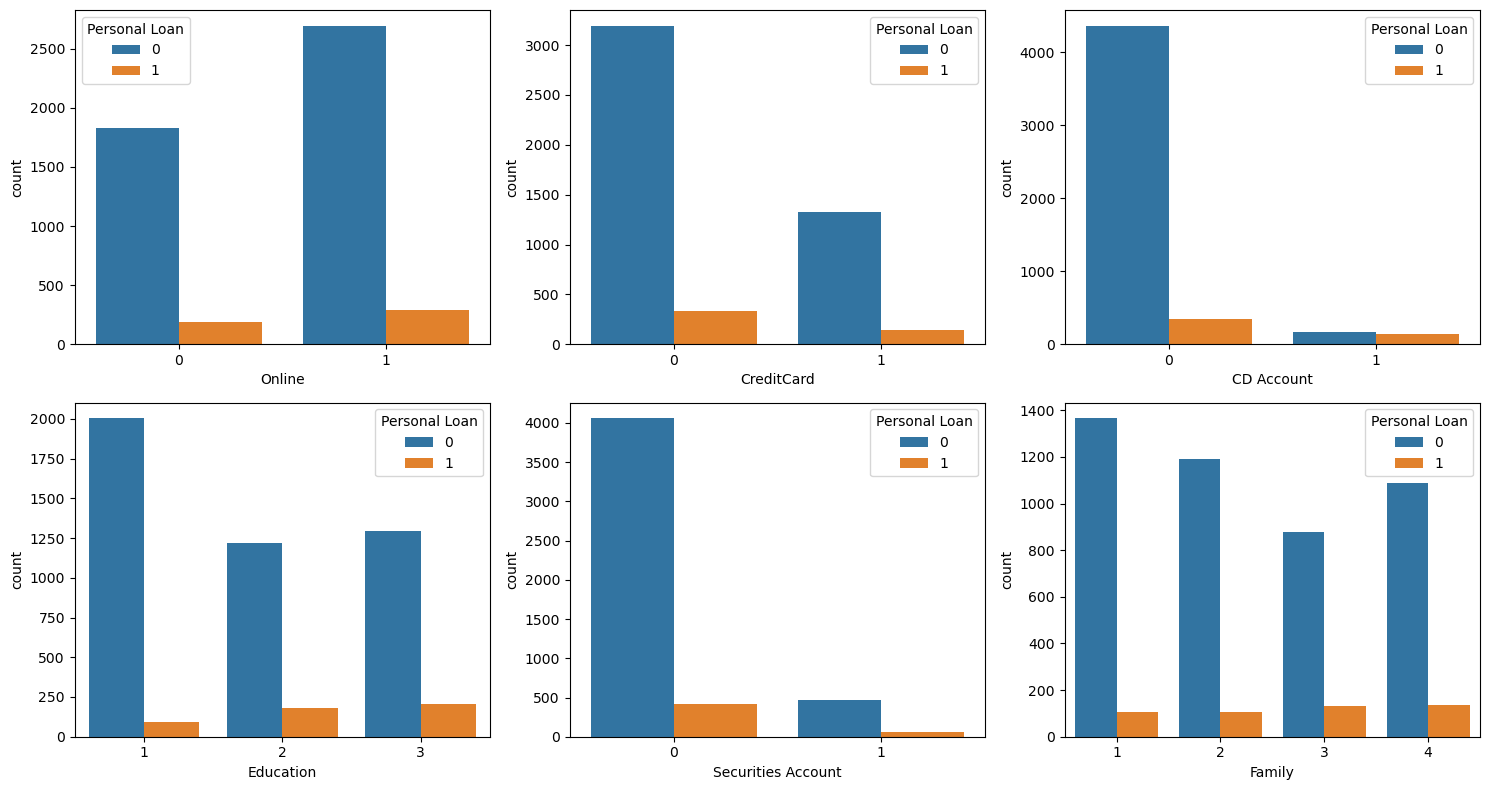

In [58]:
cat_cols = ['Online','CreditCard','CD Account','Education','Securities Account','Family']

f,ax = plt.subplots(2,3)

for i,v in zip(cat_cols,ax.flatten()):
    sns.countplot(x = df[i], hue = df['Personal Loan'],ax = v)
plt.tight_layout()
plt.show()

### Multivariate Analysis

<AxesSubplot:>

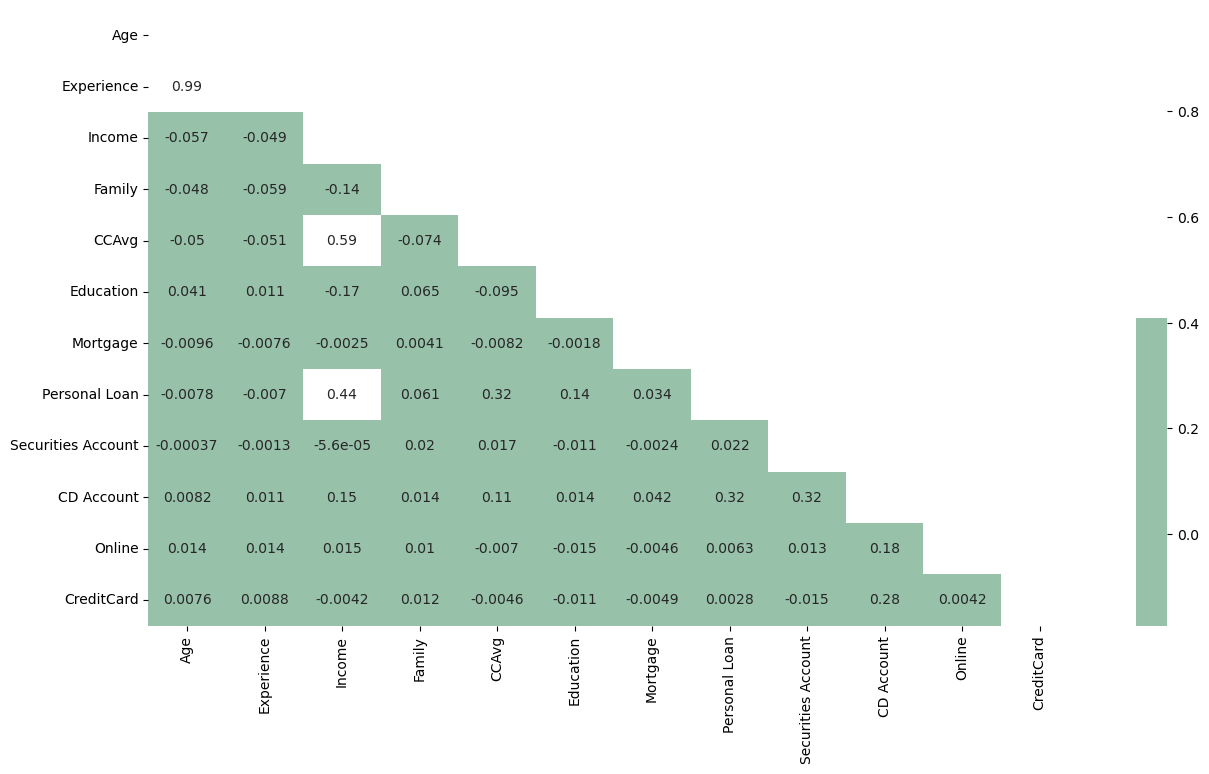

In [60]:
sns.heatmap(df.corr(),cmap = colors, annot = True, mask = np.triu(df.corr()))

### Plot the boxplot to check for outliers

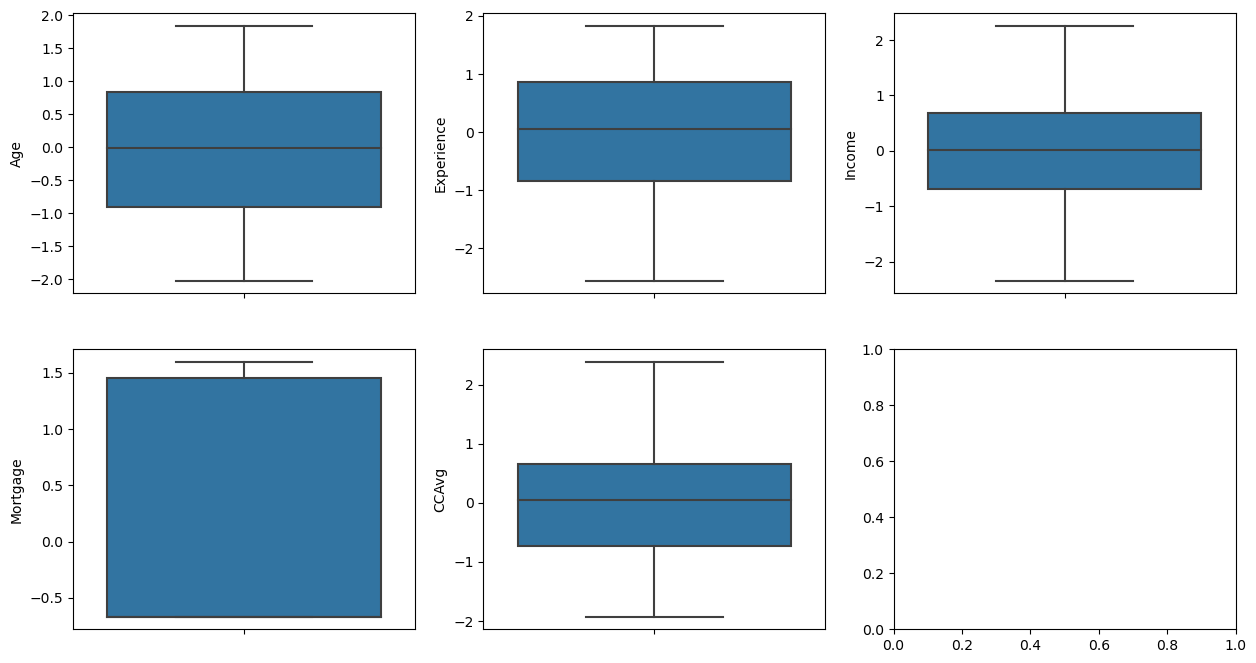

In [61]:
num_cols = ['Age','Experience','Income','Mortgage','CCAvg']

f,ax = plt.subplots(2,3)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = df[i],ax = v)

### Treatment of outliers using PowerTransformer method

In [62]:
pt = PowerTransformer()

for i in num_cols:
    df[i] = pt.fit_transform(df[[i]])

df.head()

Age  Experience    Income  Family     CCAvg  Education  Mortgage  \
0 -1.770555   -1.698345 -0.380322       4  0.119979          1 -0.666514   
1 -0.036720   -0.101130 -0.860121       3  0.045744          1 -0.666514   
2 -0.555343   -0.437428 -2.047023       1 -0.391621          1 -0.666514   
3 -0.900004   -0.944249  0.722245       1  0.754237          2 -0.666514   
4 -0.900004   -1.030909 -0.496835       4 -0.391621          2 -0.666514   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Generating synthetic data using SMOTE to avoid imbalance in the target variable

In [63]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [64]:
sm = SMOTE()

x = df.drop(columns = 'Personal Loan')
y = df['Personal Loan']

x_resampled , y_resampled = sm.fit_resample(x,y)

y_resampled.value_counts()

0    4520
1    4520
Name: Personal Loan, dtype: int64

### Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x_resampled,y_resampled,test_size=0.30)

### Scaling Numeric columns

In [66]:
ss = StandardScaler()

for i in num_cols:
    if i in xtrain.columns:
        xtrain[i] = ss.fit_transform(xtrain[[i]])
        xtest[i] = ss.transform(xtest[[i]])


### Building different models and evaluating using appropriate technique

In [67]:
# Creating a user defined function to store values of accuracy , f1 score , auc_score of both train and test data 

performance_df = pd.DataFrame(columns = ['Model_Name','Train_Accuracy','Train_F1score','Test_Accuracy',
                                         'Test_F1score','AUC_Score','Remarks'])

def model_performance(model,name):
    global performance_df
    
    # predicting train and test data
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    pred_prob = model.predict_proba(xtest)[:,1]
    
    # calculating accuracy and f1 score for both train and test
    
    acc_train = accuracy_score(ytrain,pred_train)
    acc_test = accuracy_score(ytest,pred_test)
    f1_train = f1_score(ytrain,pred_train)
    f1_test = f1_score(ytest,pred_test)
    auc_score = roc_auc_score(ytest,pred_prob)

    # defining function for remarks
    
    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 0.2 or train_acc > 0.95:
            return 'Over Fit'
        elif train_acc < 0.8 or test_acc < 0.8:
            return 'Under Fit'
        else:
            return 'Good Fit'

    # adding train and test scores in performance_df dataframe
    
    performance_df = performance_df.append({'Model_Name':name,'Train_Accuracy':acc_train,'Train_F1score':f1_train,
                                           'Test_Accuracy':acc_test,'Test_F1score':f1_test,
                                           'AUC_Score':auc_score,'Remarks':remark(acc_train,acc_test)},ignore_index=True)
    
    # plotting roc_curve and calculating auc_score
    
    fpr , tpr , threshold = roc_curve(ytest,pred_prob)
    
    plt.plot(fpr,tpr)
    plt.plot([0.0,1.0],'r--')
    plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))


### Logistic Regression

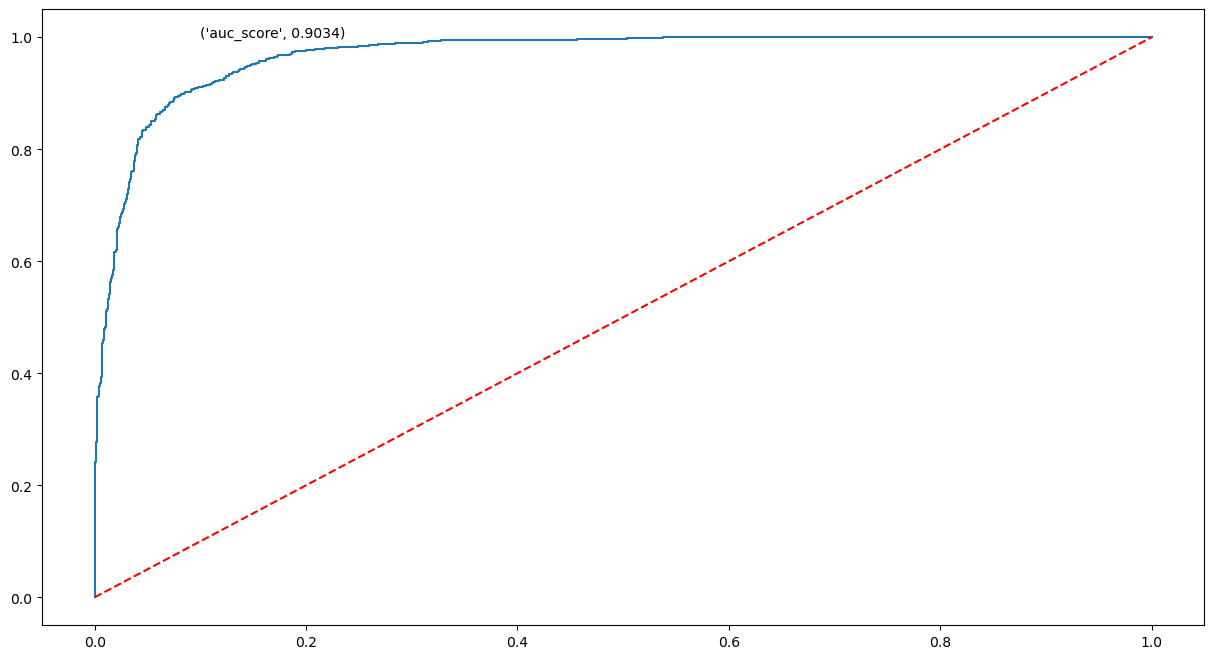

In [68]:
# Logistic Regression Model

model_lr = LogisticRegression().fit(xtrain,ytrain)

model_performance(model_lr,'Logistic Regression Model')

### DecisionTree

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

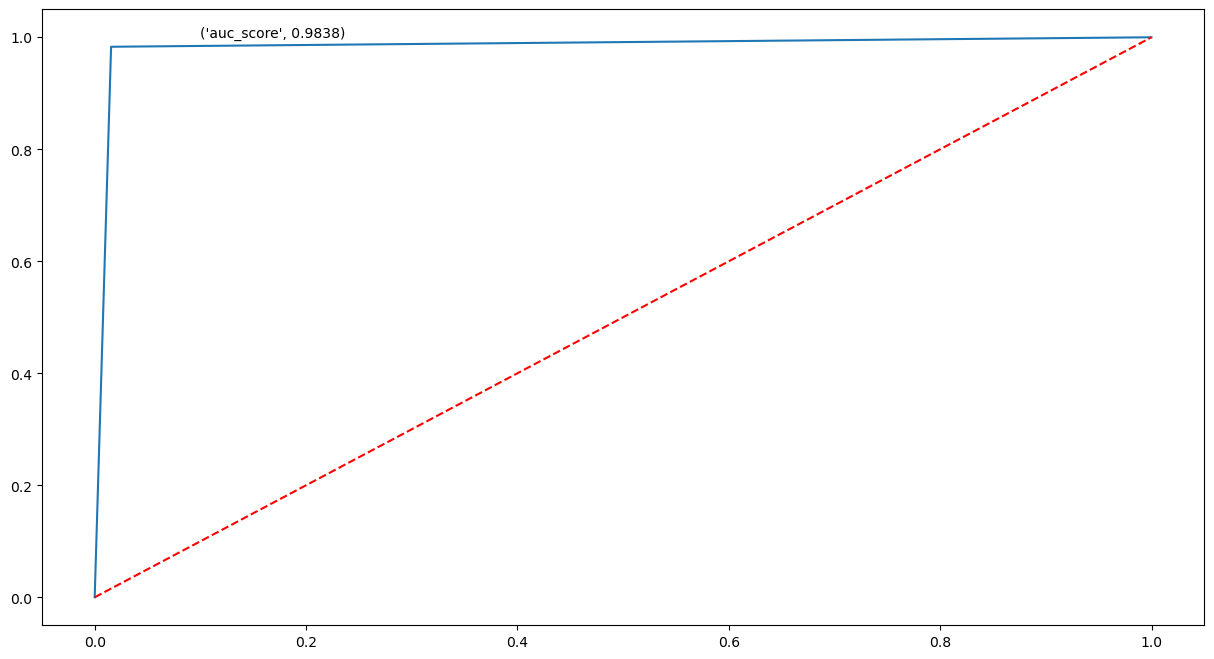

In [69]:
# DecisionTree Model without tuning

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)

model_performance(model_dt,'DecisionTree Model')

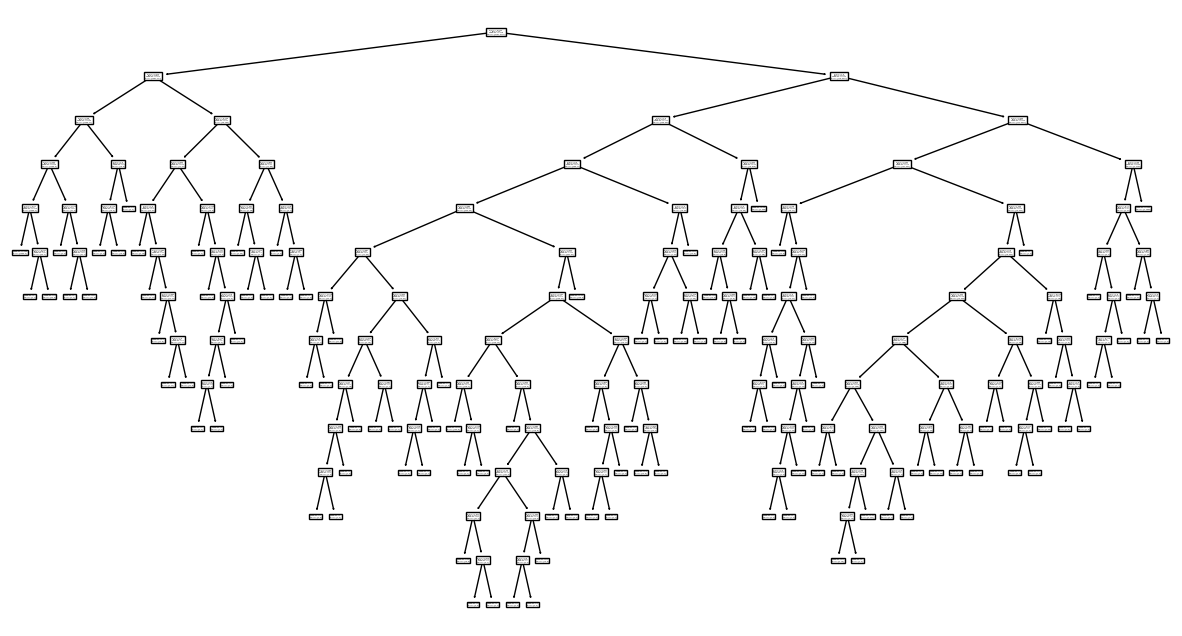

In [70]:
tree.plot_tree(model_dt)
plt.show()

Best parameters are : {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 50, 'min_samples_split': 2}


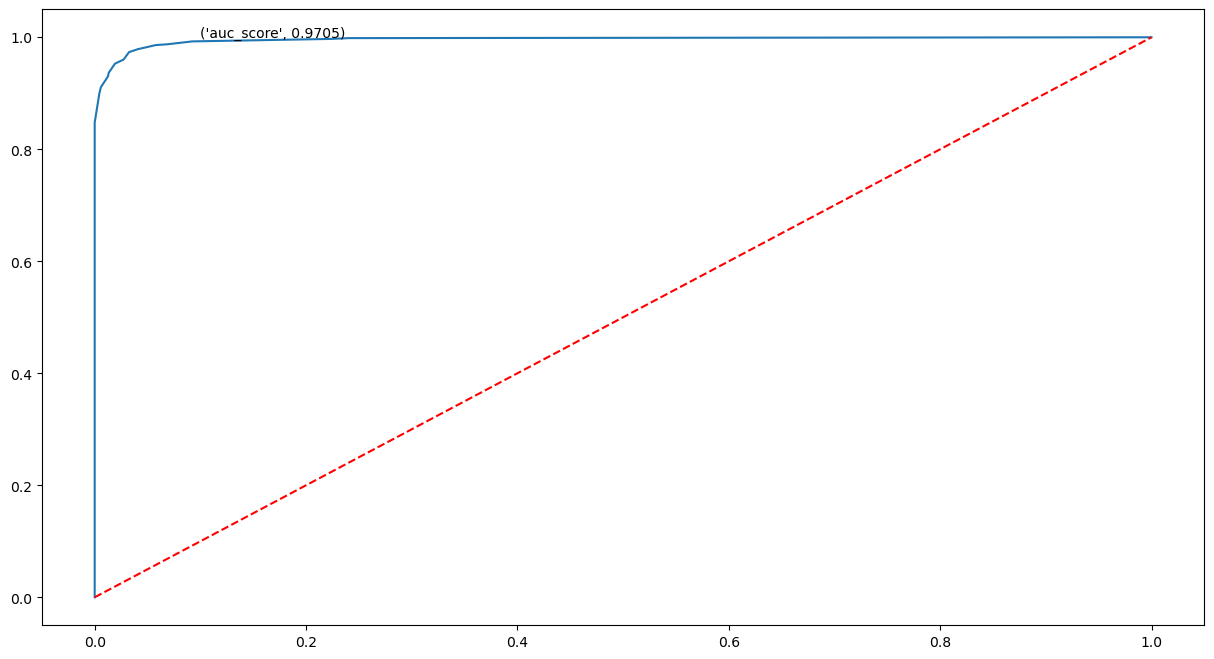

In [71]:
# Decision Tree model with hyperparameter tuning

params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [150, 100, 50],
    'max_features': ['sqrt', 'log2', None],
    'criterion':['gini','entropy']
}

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_dt.best_params_)

model_dt_tuned = DecisionTreeClassifier(criterion = grid_dt.best_params_.get('criterion'),
                                       max_depth = grid_dt.best_params_.get('max_depth'),
                                       min_samples_leaf = grid_dt.best_params_.get('min_samples_leaf'),
                                       min_samples_split = grid_dt.best_params_.get('min_samples_split'),
                                       max_features = grid_dt.best_params_.get('max_features')).fit(xtrain,ytrain)

model_performance(model_dt_tuned,name = 'Decision Tree Model with tuning')


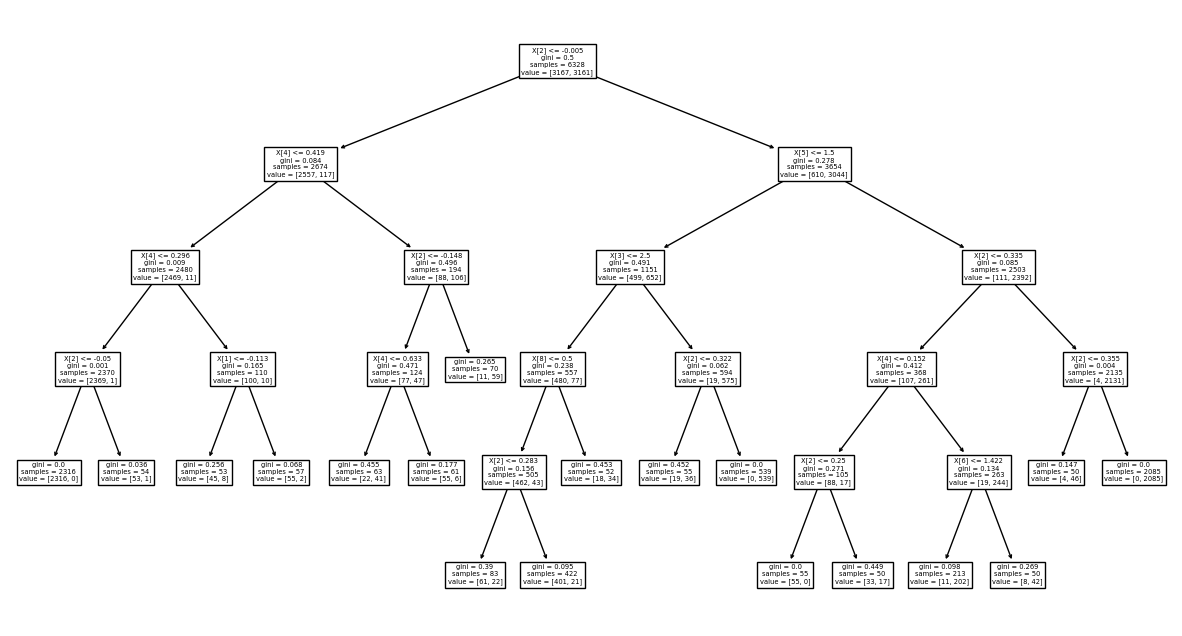

In [72]:
tree.plot_tree(model_dt_tuned)
plt.show()

### Random Forest

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes.

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.

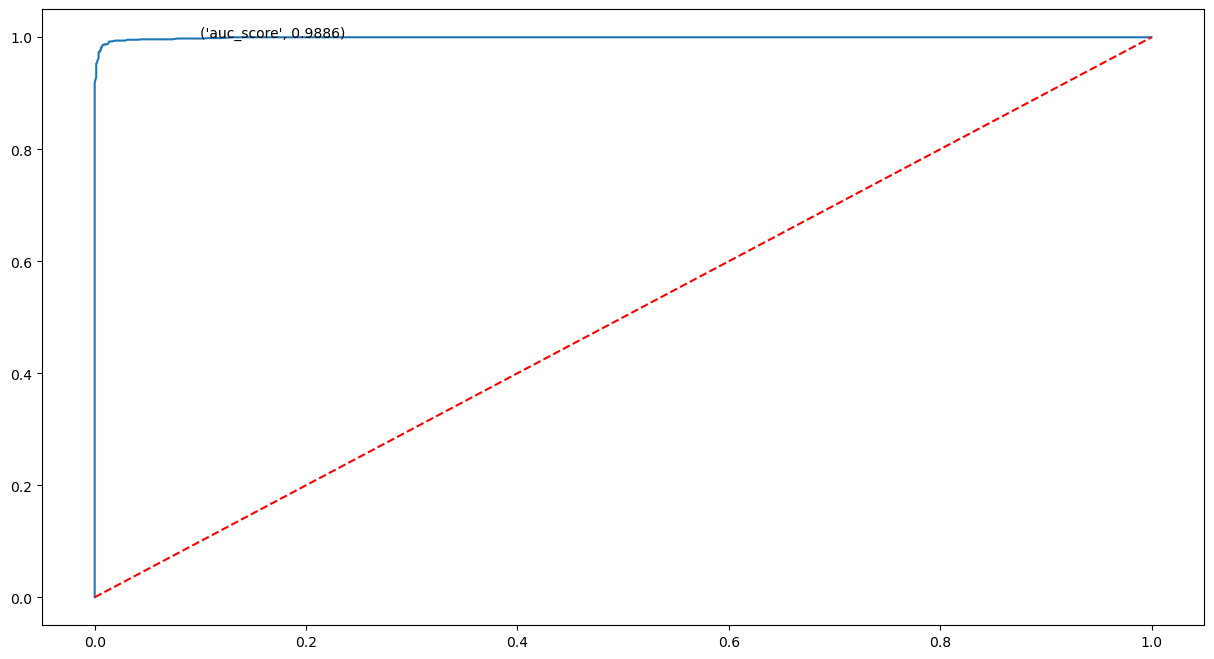

In [73]:
# RandomForest model w/o tuning

model_rf = RandomForestClassifier().fit(xtrain,ytrain)

model_performance(model_rf,'RandomForest Model w/o tuning')

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


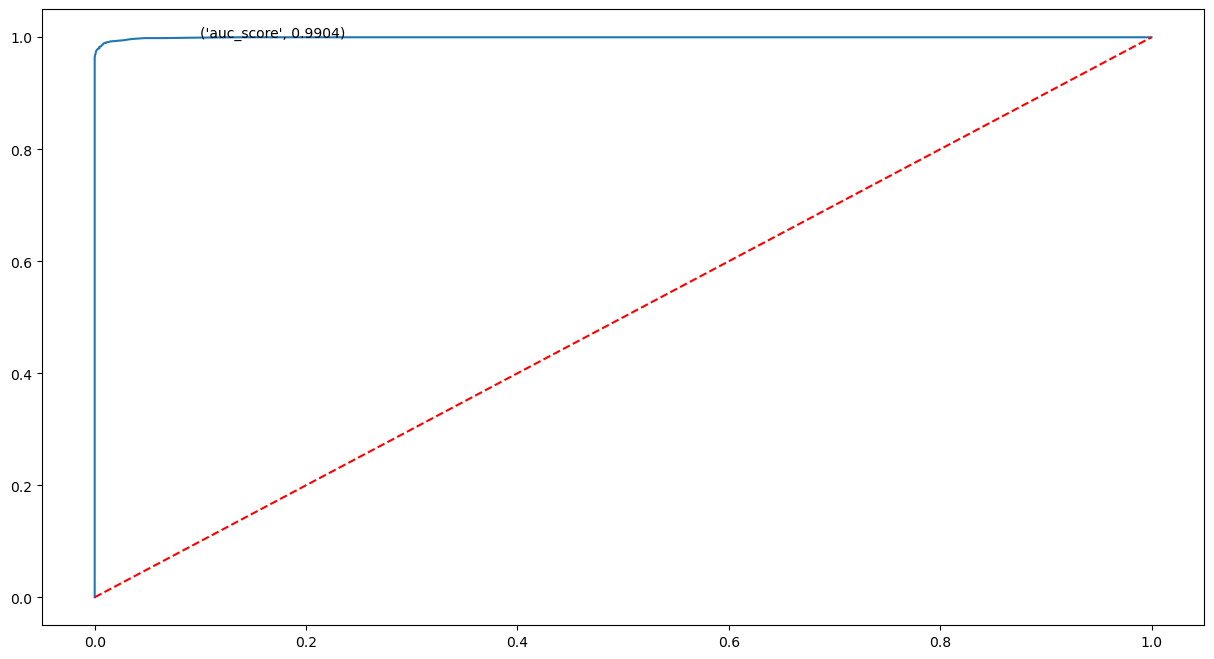

In [74]:
# Random Forest model with Hyperparameter tuning

params = {
    'n_estimators': [10,20,30],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion':['gini','entropy']
}

grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params).fit(xtrain,ytrain)

print(grid_rf.best_params_)

model_rf_tuned = RandomForestClassifier(n_estimators= grid_rf.best_params_.get('n_estimators'),
                                       max_depth = grid_rf.best_params_.get('max_depth'),
                                       min_samples_split = grid_rf.best_params_.get('min_samples_split'),
                                       min_samples_leaf = grid_rf.best_params_.get('min_samples_leaf'),
                                       max_features = grid_rf.best_params_.get('max_features'),
                                       bootstrap = grid_rf.best_params_.get('bootstrap'),
                                       criterion = grid_rf.best_params_.get('criterion')).fit(xtrain,ytrain)

model_performance(model_rf_tuned,'RandomForest Model with tuning')

### K Nearest Neighbor

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for K nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like Euclidean, Manhattan, Chebyshev, Hamming, and so on.

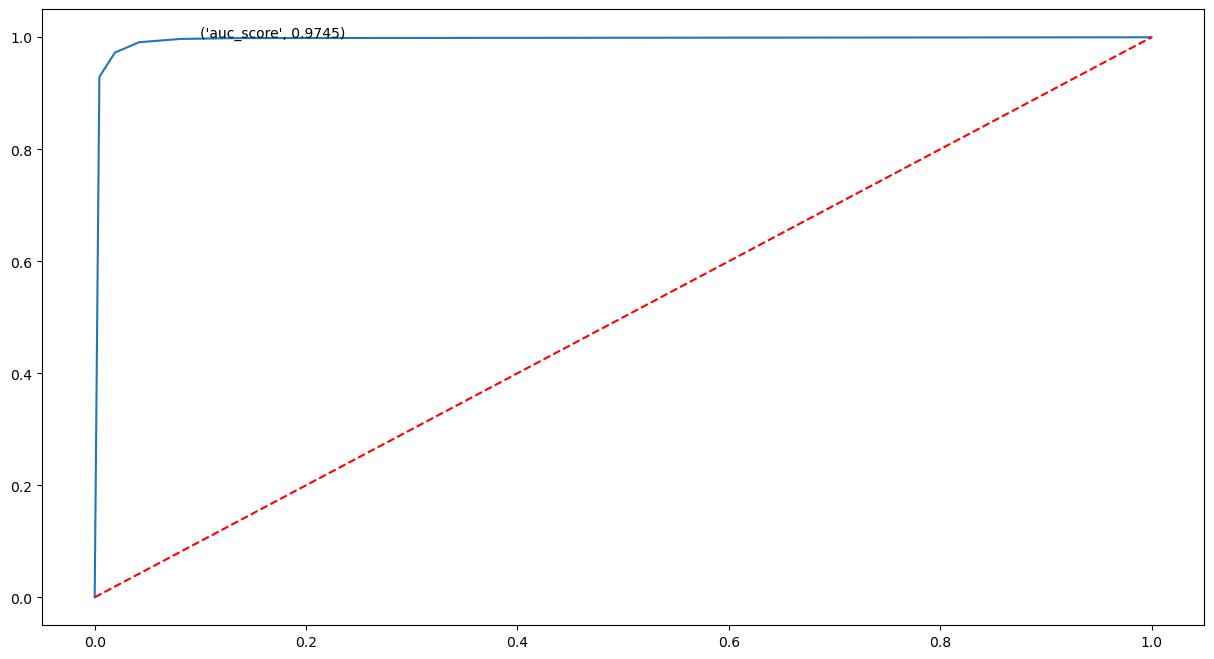

In [75]:
# KNN Model w/o tuning

model_knn = KNeighborsClassifier().fit(xtrain,ytrain)

model_performance(model_knn,'KNN Model w/o tuning')

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


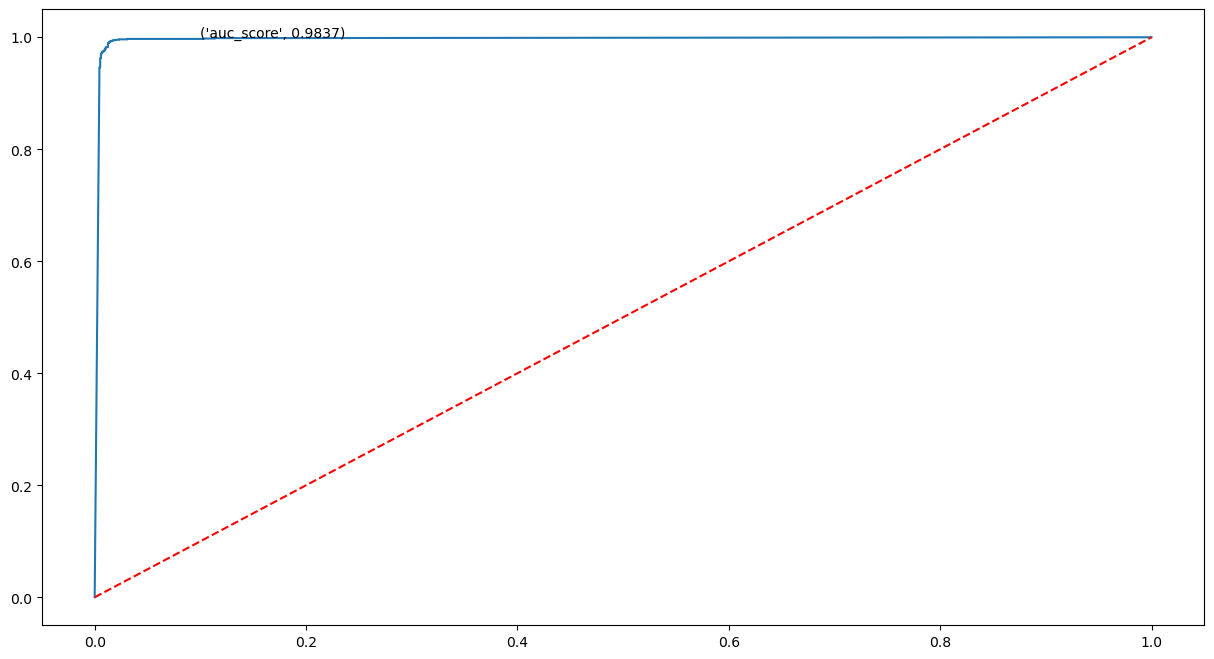

In [76]:
# KNN Model with Hyperparamter tuning

params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric' : ['Manhattan','Euclidean', 'minkowski']
}

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params).fit(xtrain,ytrain)

print(grid_knn.best_params_)

model_knn = KNeighborsClassifier(n_neighbors= grid_knn.best_params_.get('n_neighbors'),
                                weights = grid_knn.best_params_.get('weights'),
                                metric = grid_knn.best_params_.get('metric')).fit(xtrain,ytrain)

model_performance(model_knn,'KNN Model with tuning')

### AdaBoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

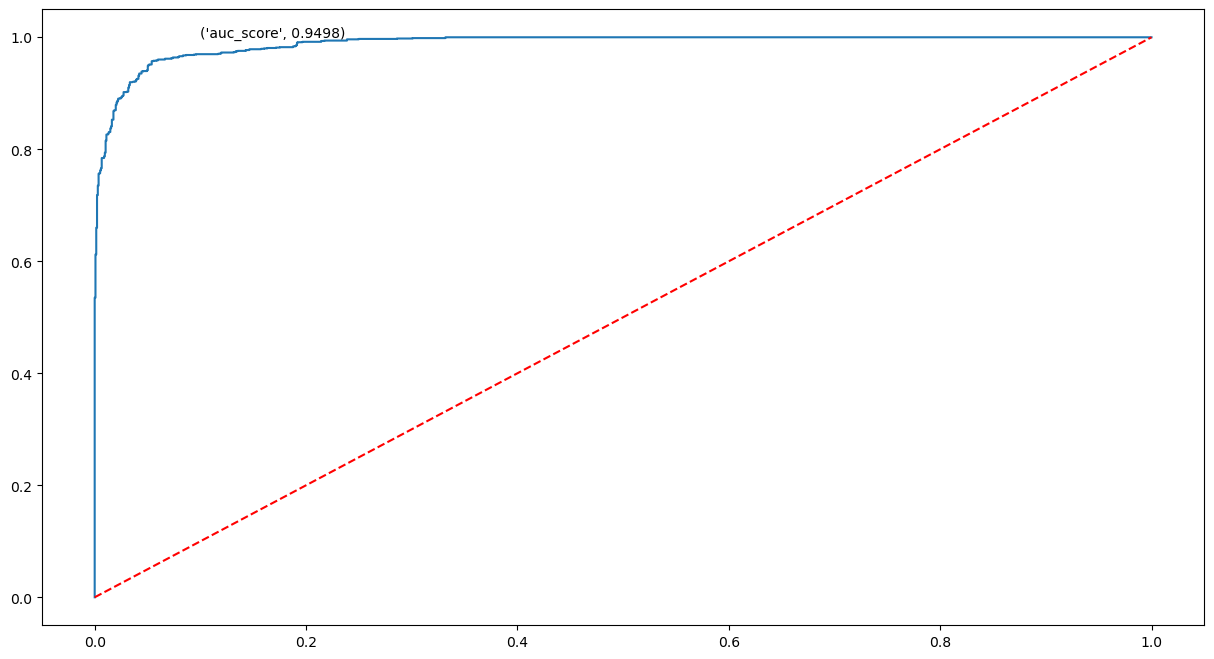

In [77]:
# AdaBoost Model w/o tuning

model_ab = AdaBoostClassifier().fit(xtrain,ytrain)

model_performance(model_ab,name = 'AdaBoost Model w/o tuning')

Best parameters are : {'learning_rate': 1, 'n_estimators': 200}


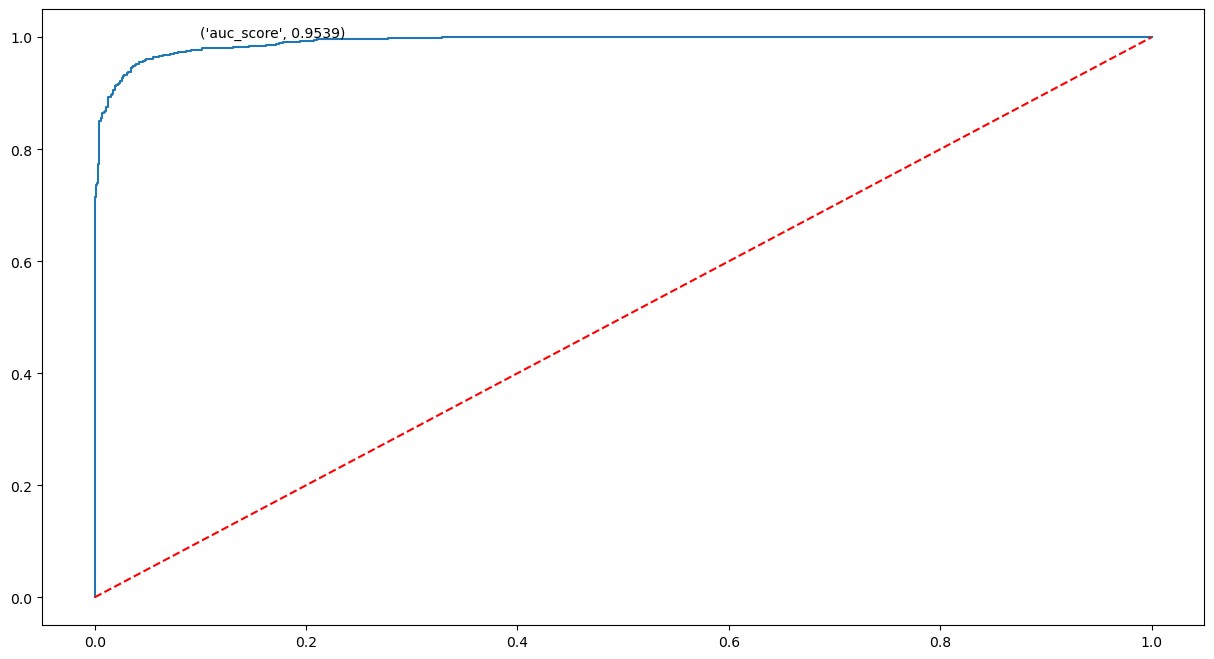

In [78]:
# Adaboost Model with Hyperparameter tuning

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ab = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_ab.best_params_)

model_ab_tuned = AdaBoostClassifier(n_estimators = grid_ab.best_params_.get('n_estimators'),
                                   learning_rate = grid_ab.best_params_.get('learning_rate')).fit(xtrain,ytrain)

model_performance(model_ab_tuned,name = 'AdaBoost Model with tuning')

### GradientBoosting

This method optimizes the differentiable loss function by building the number of weak learners (decision trees) sequentially. It considers the residuals from the previous model and fits the next model to the residuals. The algorithm uses a gradient descent method to minimize the error.

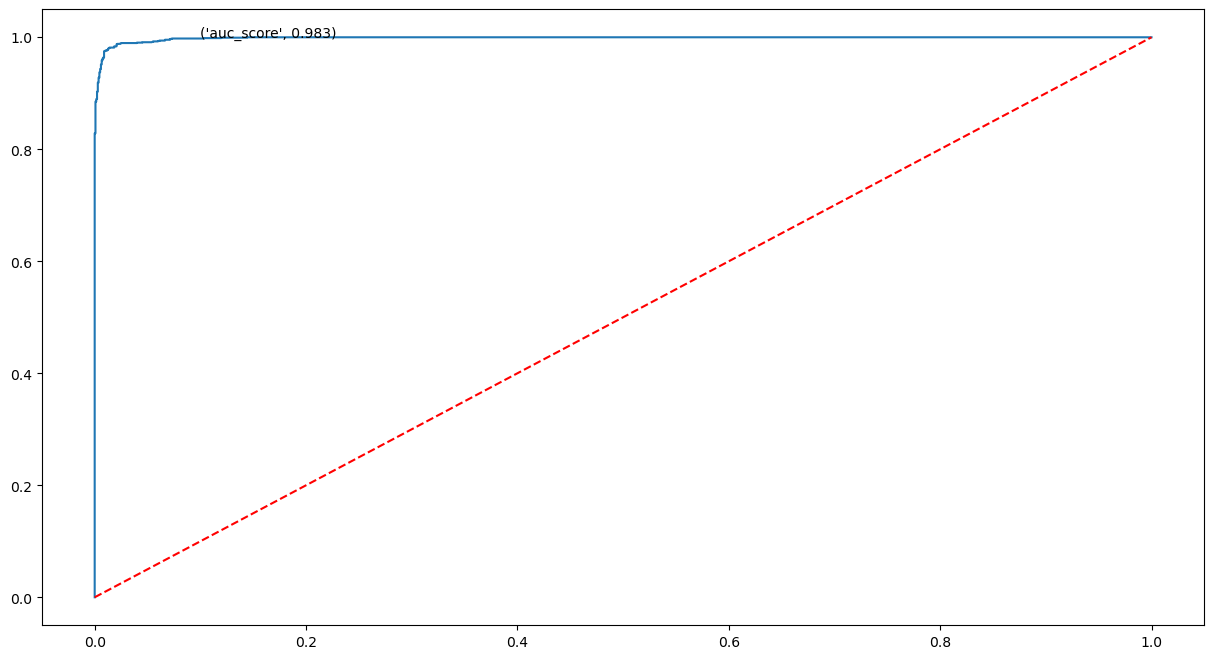

In [79]:
# Gradient Boosting Model

model_gb = GradientBoostingClassifier().fit(xtrain,ytrain)

model_performance(model_gb, name = 'GradientBoosting Model w/o tuning')

Best parameters are : {'learning_rate': 1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 30}


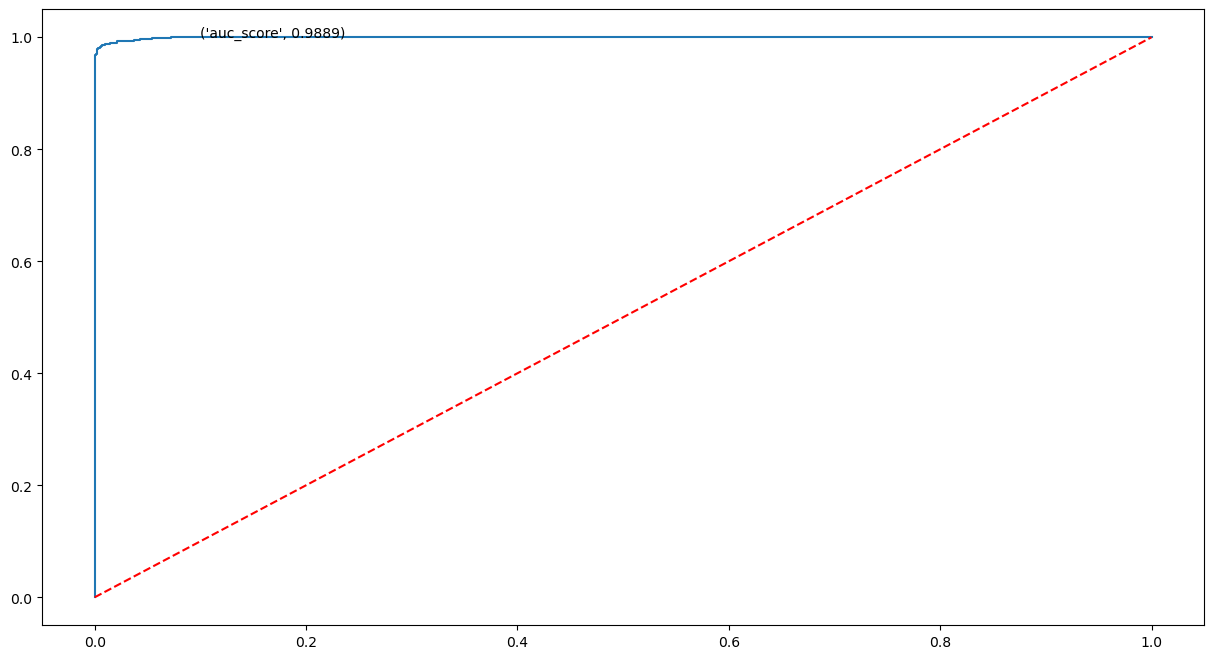

In [80]:
# Gradient Boosting Model with Hyperparameter tuning

params = {
    'n_estimators': [10,20,30],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_gb = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_gb.best_params_)

model_gb_tuned = GradientBoostingClassifier(n_estimators = grid_gb.best_params_.get('n_estimators'),
                                           learning_rate = grid_gb.best_params_.get('learning_rate'),
                                           max_depth = grid_gb.best_params_.get('max_depth'),
                                           min_samples_split = grid_gb.best_params_.get('min_samples_split'),
                                           min_samples_leaf = grid_gb.best_params_.get('min_samples_leaf'),
                                           max_features = grid_gb.best_params_.get('max_features')).fit(xtrain,ytrain)

model_performance(model_gb_tuned, name = 'GradientBoosting Model with tuning')

### XGBoost

XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.

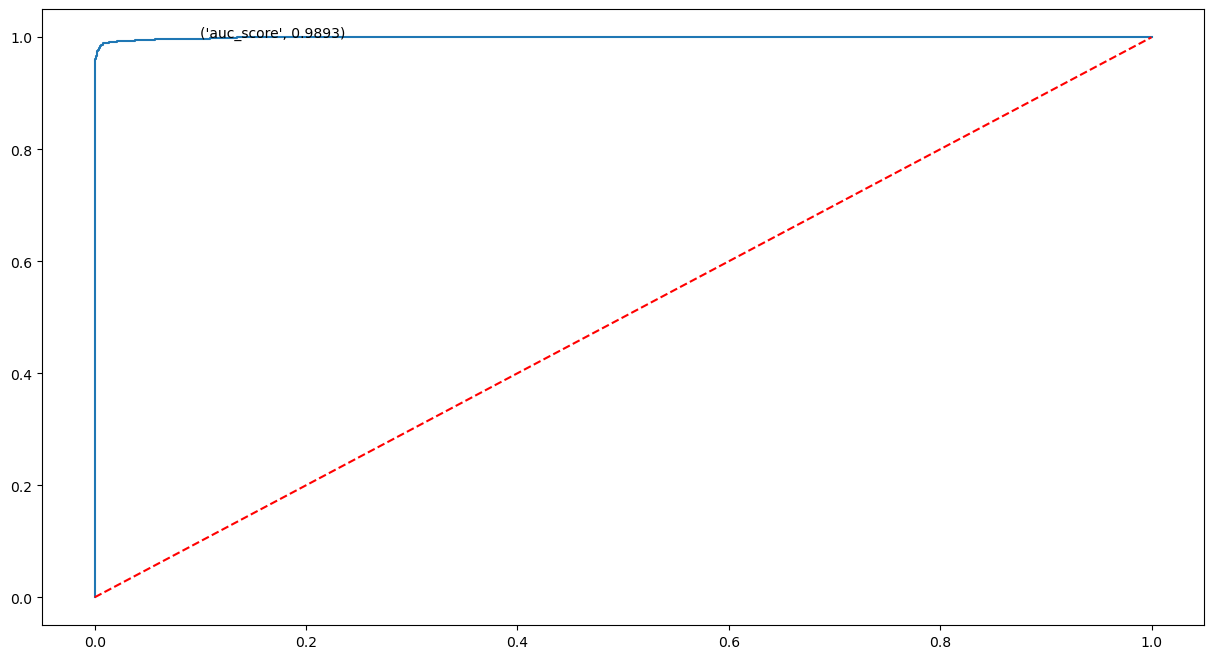

In [81]:
# XGB Model without tuning

model_xgb = XGBClassifier().fit(xtrain,ytrain)

model_performance(model_xgb,name = 'XGB Model w/o tuning')

Best parameters are : {'gamma': 0.1, 'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}


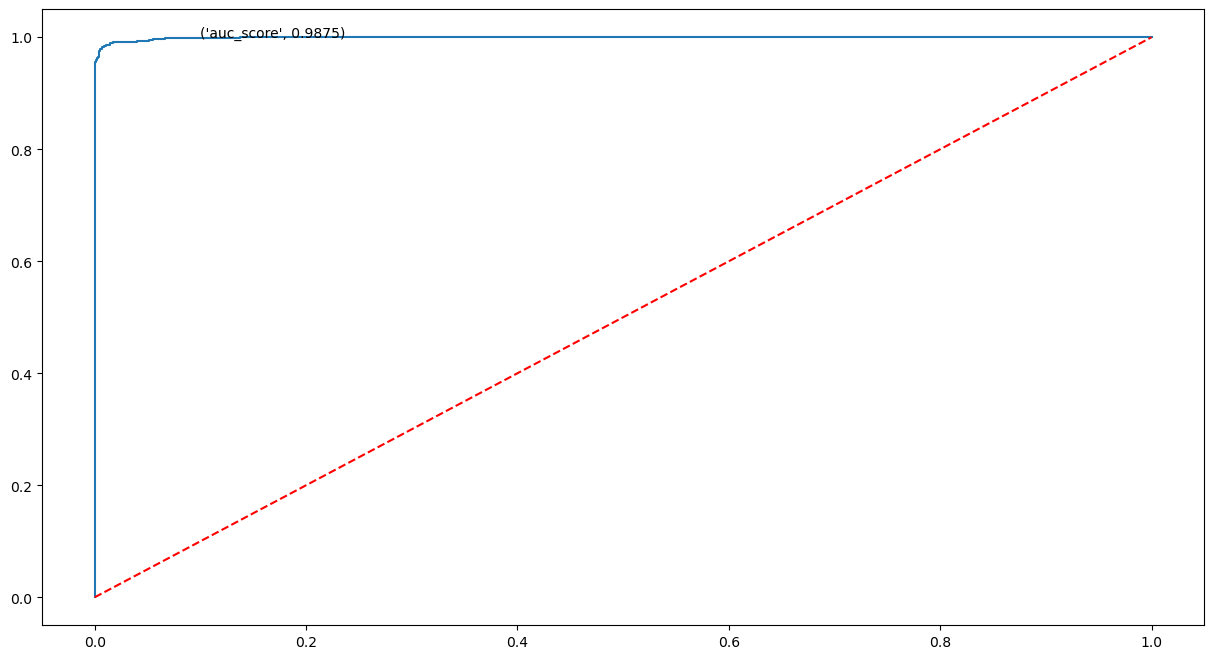

In [82]:
# XGB Model with Hyperparameter tuning

params = {
    'n_estimators': [25,50,75],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5]
}

grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_xgb.best_params_)

model_xgb_tuned = XGBClassifier(n_estimators = grid_xgb.best_params_.get('n_estimators'),
                               learning_rate = grid_xgb.best_params_.get('learning_rate'),
                               max_depth = grid_xgb.best_params_.get('max_depth'),
                               gamma = grid_xgb.best_params_.get('gamma')).fit(xtrain,ytrain)

model_performance(model_xgb_tuned,name = 'XGB Model with tuning')

### Stacking Classifier

Stacking is a machine learning technique that takes several classification or regression models and uses their predictions as the input for the meta-classifier (final classifier) or meta-regressor (final regressor).

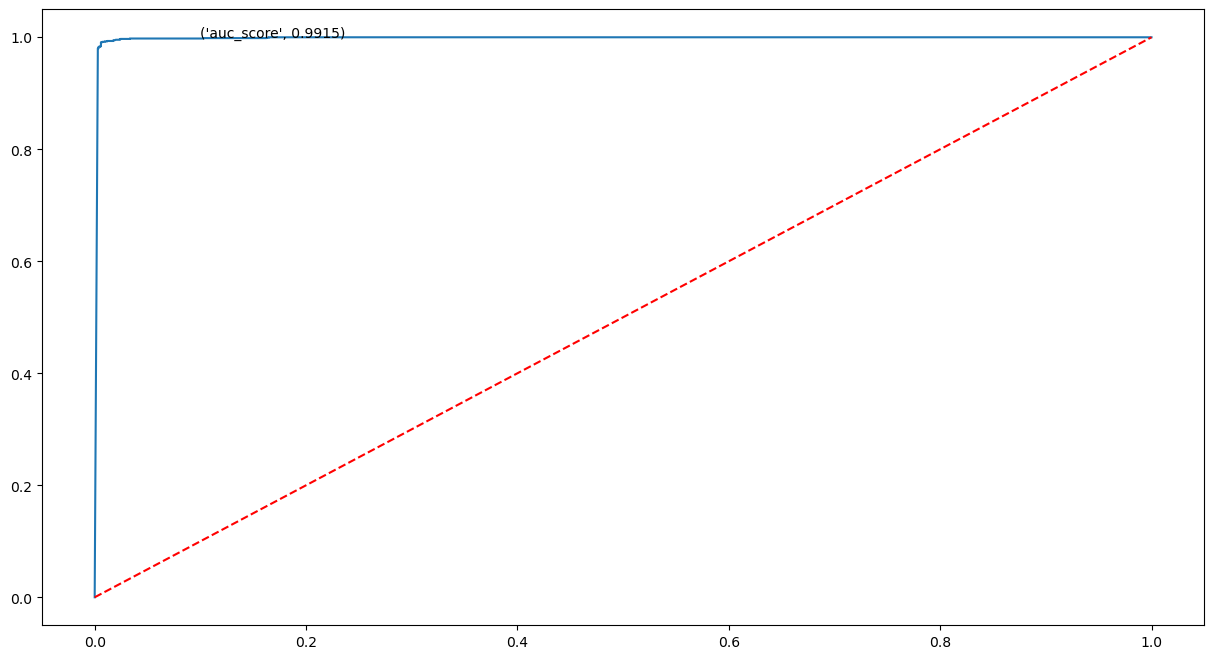

In [83]:
base_learners = [('model_dt',DecisionTreeClassifier(criterion='entropy',max_depth=15,max_features='log2',
                                                    min_samples_leaf= 1,min_samples_split= 5)),
                 ('model_rf',RandomForestClassifier(criterion='entropy',max_depth=15,
                                                    max_features='log2',min_samples_leaf=1,n_estimators= 30)),
                ('model_knn', KNeighborsClassifier(n_neighbors = 3,weights= 'distance',metric= 'minkowski' ))]

model_stack = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB(), n_jobs = -1).fit(xtrain,ytrain)

model_performance(model_stack,'Stacking Model')

### Comparing performance's of all Models¶

In [84]:
def highlight_row(df):
    color_green = ['background-color : lightgreen']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

In [85]:
performance_df.style.apply(highlight_row, axis = 1)

In [88]:
performance_df

Model_Name  Train_Accuracy  Train_F1score  \
0            Logistic Regression Model        0.905183       0.906425   
1                   DecisionTree Model        1.000000       1.000000   
2      Decision Tree Model with tuning        0.973135       0.973178   
3        RandomForest Model w/o tuning        1.000000       1.000000   
4       RandomForest Model with tuning        1.000000       1.000000   
5                 KNN Model w/o tuning        0.979140       0.979394   
6                KNN Model with tuning        1.000000       1.000000   
7            AdaBoost Model w/o tuning        0.947851       0.948630   
8           AdaBoost Model with tuning        0.961757       0.962140   
9    GradientBoosting Model w/o tuning        0.988306       0.988258   
10  GradientBoosting Model with tuning        1.000000       1.000000   
11                XGB Model w/o tuning        1.000000       1.000000   
12               XGB Model with tuning        1.000000       1.000000   
13                      Stacking Model        1.000000       1.000000   

    Test_Accuracy  Test_F1score  AUC_Score   Remarks  
0        0.903392      0.904866   0.968218  Good Fit  
1        0.983776      0.983800   0.983777  Over Fit  
2        0.970501      0.970653   0.995715  Over Fit  
3        0.988569      0.988582   0.999261  Over Fit  
4        0.990413      0.990427   0.999564  Over Fit  
5        0.974558      0.975027   0.995500  Over Fit  
6        0.983776      0.984012   0.996409  Over Fit  
7        0.949853      0.950401   0.988613  Good Fit  
8        0.953909      0.954363   0.991993  Over Fit  
9        0.983038      0.983001   0.998525  Over Fit  
10       0.988938      0.988930   0.999487  Over Fit  
11       0.989307      0.989303   0.999302  Over Fit  
12       0.987463      0.987463   0.999252  Over Fit  
13       0.991519      0.991516   0.998043  Over Fit

Based on the analysis, we observed that certain models performed well on the training set but showed reduced performance on unseen data, indicating overfitting. Conversely, some models exhibited strong performance on both the training and unseen data. Among these models, the AdaBoost model stood out with the highest performance. Therefore, we can confidently consider the AdaBoost model as our final model, given its consistent and superior performance across both datasets.

In [86]:
# Creating a code that creates a pipeline for preprocessing user input before making a prediction.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pt = PowerTransformer()
model_ab = AdaBoostClassifier()

pipeline_df = pd.read_excel('Data-1.xlsx')

x = pipeline_df.drop(columns = ['Personal Loan','ID','ZIP Code'])
y = pipeline_df['Personal Loan']

sm = SMOTE()
x_resampled , y_resampled = sm.fit_resample(x,y)

education_oe = OrdinalEncoder(categories = [['Undergrad','Graduate','Advanced/Professional']])

preprocess = ColumnTransformer(
    transformers= [('power transformer',pt,num_cols)] , remainder = 'passthrough')

pipeline = Pipeline([('preprocess',preprocess),('classifier',model_ab)])

x_train , x_test , y_train , y_test = train_test_split(x_resampled,y_resampled ,test_size = 0.30 , random_state = 24)

# Fitting the model

pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power transformer',
                                                  PowerTransformer(),
                                                  ['Age', 'Experience',
                                                   'Income', 'Mortgage',
                                                   'CCAvg'])])),
                ('classifier', AdaBoostClassifier())])

In [87]:
# Making predictions

print('Did this customer accept the personal loan offered in the last campaign?\n')

# For No enter - 0 and for Yes - 1

data = {'Age': 25,
       'Experience':2,
       'Income': 55,
       'Family':3,
       'CCAvg':0.4,
       'Education':2,
       'Mortgage':0,
       'Securities Account':0,
       'CD Account':0,
       'Online':1,
       'CreditCard':1}

input_data = pd.DataFrame([data])

prediction = pipeline.predict(input_data)

print(input_data)

if prediction == 0:
    print('\nThe customer has rejected the loan offered in the last campaign')
else:
    print('\nThe customer has accepted the loan offered in the last campaign')

Did this customer accept the personal loan offered in the last campaign?

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           2      55       3    0.4          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   0           0       1           1  

The customer has rejected the loan offered in the last campaign
